In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the cuisine_ingredients csv file
column_names = ["cuisine", "recipe", "ingredients", "full_ingredients", "image_url"]
df = pd.read_csv("cuisine_ingredients.csv", names=column_names, encoding='utf-16')

# Overview of the dataset
df.sample(20, random_state=1)

,cuisine,recipe,ingredients,full_ingredients,image_url
3403,Italian,Leek risotto with parmesan crisps,"['leeks', 'butter', 'tarragon', 'arborio rice'...","['2 medium leeks, sliced', 'thick slice of but...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
589,British,Chicken pie,"['butter', 'flour', 'chicken stock', 'double c...","['2 tbsp butter, plus extra for frying', '1 he...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1404,British,Easy sage and onion stuffing,"['onions', 'sage', 'breadcrumbs', 'butter', 'p...","['4 large onions', '10 sage leaves', '125g/¼lb...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1195,British,Pear crumble,"['plain flour', 'butter', 'cinnamon', 'demerar...","['75g/3oz plain flour', '75g/3oz butter, cold,...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
3248,Italian,Chicken Marsala,"['chicken breasts', 'plain flour', 'butter', '...","['4 chicken breasts, skin removed', '40g/1½oz ...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1840,Caribbean,Jerk chicken with pomegranate rice,"['chicken breasts', 'chicken breasts', 'onion'...","['4 part-boned chicken breasts, skin on (subst...",NaN
3060,Indian,Tandoori chicken skewers,"['chicken thigh', 'yoghurt', 'curry powder', '...","['450g/1lb chicken thigh fillets, trimmed of f...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
372,British,Paul Hollywood's Arctic roll,"['sunflower oil', 'ice cream', 'raspberry jam'...","['a little sunflower oil, for greasing', '500m...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
2635,French,Vegan French toast with berries,"['maple syrup', 'vanilla extract', 'white brea...","['400g/14oz can organic chickpeas', '1 tsp map...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...
1123,British,The Hairy Bikers' fish pie with cheese mash,"['milk', 'onion', 'white fish', 'butter', 'pla...","['400ml/14fl oz whole milk', '1 small onion, t...",https://ichef.bbci.co.uk/food/ic/food_16x9_832...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cuisine           4724 non-null   object
 1   recipe            4724 non-null   object
 2   ingredients       4724 non-null   object
 3   full_ingredients  4724 non-null   object
 4   image_url         2515 non-null   object
dtypes: object(5)
memory usage: 184.7+ KB


There are 4724 rows in the dataset. At a glance, there are no null values in cuisine, recipe, ingredients, and full_ingredients columns, while there are quite a few null values in the image_url column.

In [4]:
# Drop duplicated rows if any
df.drop_duplicates(inplace=True)
df.shape

(4724, 5)

When web-scraping the data, I've decided to scrape both streamlined ingredients (with green-highlighted hyperlinks to the ingredient's sites) and the full ingredient list (with the quantity of each ingredient and sometimes with some simple preparation steps) as illustrated in the below image. The full ingredient list will cover more comprehensive information but require more cleaning. To check which feature (ingredients vs. full_ingredients) should be used for the Natural Language Processing pipeline, we'll do some EDA on these variables like checking minimum and maximum numbers of characters in column ingredients to identify any outlier.

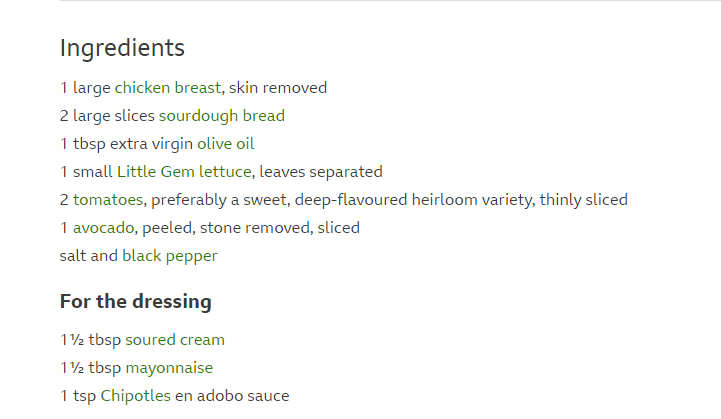
<div style="text-align: right"> (Image source: https://www.bbc.co.uk/food/recipes/californian_sourdough_59703) </div>

In [5]:
# Check the max and min number of ingredients in the "ingredients" column
ingredient_check = df.ingredients.str.split(",").apply(len)
print(f"Maximum number of ingredients in the 'ingredients' column in a recipe: {ingredient_check.max()}")
print(f"Minimum number of ingredients in the 'ingredients' column in a recipe: {ingredient_check.min()}")

Maximum number of ingredients in the 'ingredients' column in a recipe: 56
Minimum number of ingredients in the 'ingredients' column in a recipe: 1


In [6]:
# Check the max and min number of ingredients in the "full_ingredients" column
full_ingredients_check = df.full_ingredients.str.split(",").apply(len)
print(f"Maximum number of ingredients in the 'full_ingredients' column in a recipe: {full_ingredients_check.max()}")
print(f"Minimum number of ingredients in the 'full_ingredients' column in a recipe: {full_ingredients_check.min()}")

Maximum number of ingredients in the 'full_ingredients' column in a recipe: 77
Minimum number of ingredients in the 'full_ingredients' column in a recipe: 1


It seems rare that a recipe only has one ingredient. Let's visualise the number of ingredients distribution in both the "ingredients" and "full_ingredients" columns.

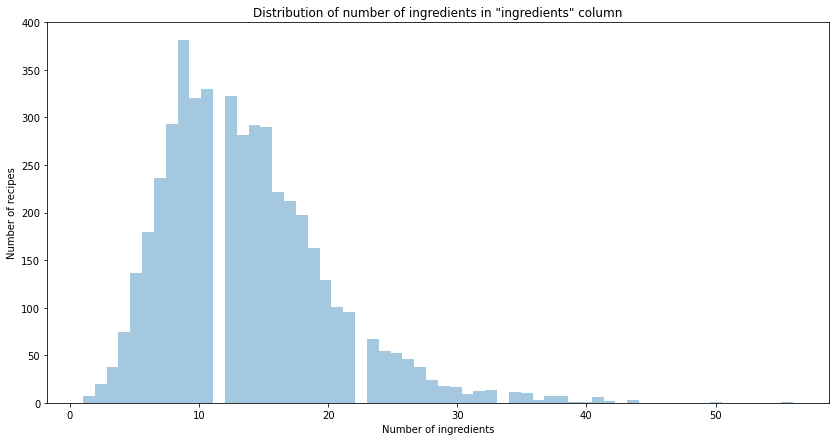

In [11]:
plt.figure(figsize=(14,7))
sns.distplot(ingredient_check, kde=False, bins=60)
plt.title('Distribution of number of ingredients in the "ingredients" column')
plt.xlabel('Number of ingredients')
plt.ylabel('Number of recipes')
plt.show()

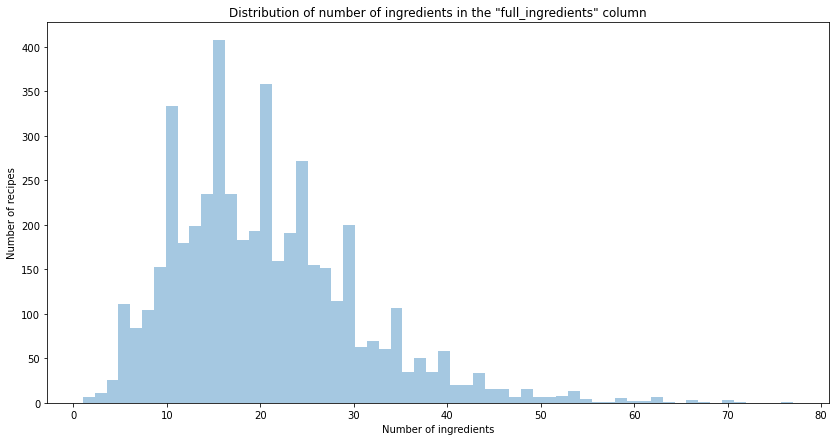

In [13]:
plt.figure(figsize=(14,7))
sns.distplot(full_ingredients_check, kde=False, bins=60)
plt.title('Distribution of number of ingredients in the "full_ingredients" column')
plt.xlabel('Number of ingredients')
plt.ylabel('Number of recipes')
plt.show()

In [ ]:
# Transform cuisine and ingredients into a seperate table
df[["cuisine", "recipe", "ingredients"]].to_csv("cuisine_ingredients_short.csv", index=False)